In [54]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

from src.data.normalize import mean_std
from src.data.readdata import ChestXrayDataSet
from src.data.dataloaders import GMC_DataLoader, NIH_DataLoader

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
gmc_dataloader = GMC_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "train")

nih_dataloader = NIH_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "train")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


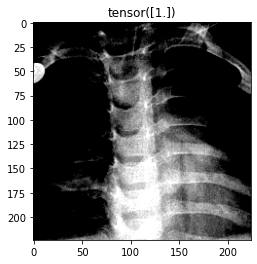

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


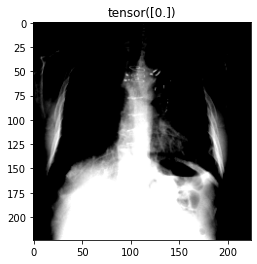

In [56]:
gmc_dataloader.show(iter = 1)
nih_dataloader.show(iter = 1)